# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [14]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact
import numpy as np
import seaborn as sns

cf.go_offline()

In [2]:
xcl = pd.read_excel('../data/Online Retail.xlsx')
o_retail = pd.DataFrame(xcl)
o_retail.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


## 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

In [67]:
data = o_retail[o_retail.Country!='United Kingdom']

data = data.loc[(data.InvoiceDate >= '2011-4-1') & (data.InvoiceDate <= '2011-4-30')]

data = data.groupby('Country')[['Quantity','Revenue']].sum()


In [68]:
data.iplot(kind='bar', xTitle='Country', title = 'Total Quantity and Revenue by Country')

## 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

In [69]:
france = o_retail[o_retail['Country'] == 'France']
france = france[(france['InvoiceDate'] >= '2011-01-01') & (france['InvoiceDate'] <= '2011-05-31')]
france = france.groupby('InvoiceDate')[['Quantity','Revenue']].sum()
france

,Quantity,Revenue
InvoiceDate,,
2011-01-05 12:42:00,359,502.07
2011-01-05 14:48:00,369,763.11
2011-01-06 14:26:00,261,283.77
2011-01-06 16:12:00,177,425.25
2011-01-07 12:07:00,488,676.16
...,...,...
2011-05-25 12:44:00,180,390.96
2011-05-25 12:54:00,374,514.74
2011-05-26 14:53:00,86,196.50


In [70]:
france.iplot(kind='line', xTitle = 'Invoice Date', yTitle = 'Amount', title = 'Quantity & Revenue sold to France')

## 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

<Axes: >

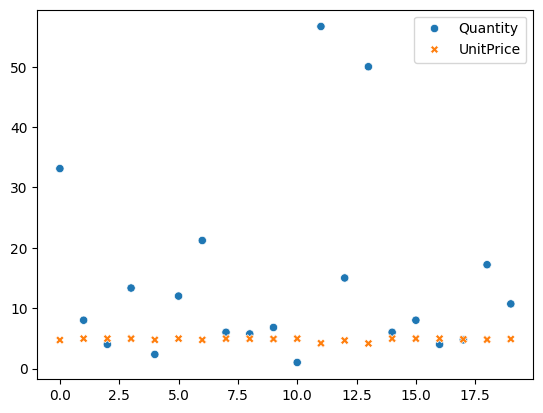

In [15]:
data = o_retail.loc[o_retail.Description=='PARTY BUNTING']

data = data.groupby('Country')[['Quantity', 'UnitPrice']].mean()

data.reset_index(inplace=True)


sns.scatterplot(data)

## 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

In [30]:
countryLst = ['EIRE','Germany','France','Netherlands']

retail = o_retail.loc[o_retail.Country.isin(countryLst)]

data = retail.pivot_table(values='Quantity', columns='Country', 
                      index='InvoiceNo', aggfunc='sum')

data.iplot(kind='hist')


## 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

## 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

## 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

## 8. Creat an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.